## Active Learning


In [ ]:
%load_ext autoreload
%autoreload 2

import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




In [ ]:
DATA_PATH = "/home/patrick/github/data/liftout/active-learning/"

SAMPLES = ["dm-embryo", "yeast", "celegans"]


for sample_name in SAMPLES:

    filenames = glob.glob(os.path.join(DATA_PATH, sample_name, "**/*.tif"), recursive=True)

    print(f"Found {len(filenames)} files for {sample_name}")

    # output
    output_path = os.path.join(DATA_PATH, sample_name, "data")
    os.makedirs(output_path, exist_ok=True)

    for idx, fname in enumerate(filenames):

        # copy file to output path, name based on idx
        new_fname = os.path.join(output_path, f"{idx:06d}.tif")
        # print(new_fname)
        # os.system(f"cp {fname} {new_fname}")

        # break


In [ ]:

for sample_name in SAMPLES:
    filenames = glob.glob(os.path.join(DATA_PATH, f"{sample_name}/data/*.tif"))

    print(f"Found {len(filenames)} files for {sample_name}")

In [ ]:

# delete non-standard images

# for sample_name in SAMPLES:
#     filenames = glob.glob(os.path.join(DATA_PATH, f"{sample_name}/data/*.tif"))
#     for fname in filenames:
#         # load image, check shape
#         img = plt.imread(fname)
        
#         if img.shape != (1024, 1536):
#             print(fname, img.shape)
#             # delete file
#             os.system(f"rm {fname}")




### Model Comparison


load baseline, dm-embryo, yeast and celegans models

compare the baseline to finetuning for specific images
pick examples where it improves

In [ ]:
%load_ext autoreload
%autoreload 2

import os
from copy import deepcopy
from pathlib import Path

import napari
import napari.utils.notifications
import numpy as np
import tifffile as tff

from fibsem.detection import detection
from fibsem.detection import utils as det_utils
from fibsem.detection.detection import DetectedFeatures
from fibsem.segmentation import model as fibsem_model
from fibsem.segmentation.model import load_model
from fibsem.structures import (
    BeamType,
    FibsemImage,
    Point,
)
import logging
import glob
from fibsem.detection.detection import Feature, LamellaCentre, LamellaLeftEdge, LamellaRightEdge
import matplotlib.pyplot as plt



In [ ]:


DATA_PATH = "/home/patrick/github/data/liftout/active-learning/train"

SAMPLES = ["dm-embryo", "yeast", "celegans"]

CHECKPOINT_BASE = os.path.join(os.path.dirname(fibsem_model.__file__), "models", "model4.pt")
CHECKPOINT_DM = "/home/patrick/github/fibsem/fibsem/segmentation/models/dm-embryo/30_04_2023_18_42_40_n20_model.pt"
CHECKPOINT_YEAST = "/home/patrick/github/fibsem/fibsem/segmentation/models/yeast/30_04_2023_18_51_45_n20_model.pt"
CHECKPOINT_CE = "/home/patrick/github/fibsem/fibsem/segmentation/models/celegans/30_04_2023_19_01_11_n20_model.pt"


checkpoints = [CHECKPOINT_BASE, CHECKPOINT_DM, CHECKPOINT_YEAST, CHECKPOINT_CE]

for sample_name, checkpoint in zip(SAMPLES, checkpoints):

    filenames = glob.glob(os.path.join(DATA_PATH, sample_name, "images/*tif"), recursive=True)

    print(f"Found {len(filenames)} files for {sample_name}")

    # output
    output_path = os.path.join(DATA_PATH, sample_name, "data")
    os.makedirs(output_path, exist_ok=True)


    for idx, fname in enumerate(filenames):

        image = FibsemImage.load(fname)

        # run detection

        # detect features
        features = [detection.NeedleTip(), detection.LamellaCentre(), 
                    detection.LamellaLeftEdge(), detection.LamellaRightEdge(), 
                    detection.LandingPost(), detection.ImageCentre()]
        pixelsize = image.metadata.pixel_size.x if image.metadata is not None else 25e-9


        dets = []
        for checkpoint in checkpoints:
            model = load_model(checkpoint=checkpoint, encoder="resnet34")
            det = detection.detect_features(
                deepcopy(image.data), model, features=features, pixelsize=pixelsize
            )

            dets.append(det)

        fig, ax = plt.subplots(1, len(dets), figsize=(25, 7))

        plt.suptitle(f"{sample_name}:{os.path.basename(fname)}")       

        names = ["Baseline", "Finetuned: Dm-Embryo", "Finetuned: Yeast", "Finetuned: Celegans"]
        for i, det in enumerate(dets):
            ax[i].imshow(det.image, cmap="gray")
            ax[i].imshow(det.rgb, alpha=0.3)
            ax[i].set_title(names[i])
            
            for f in det.features:
                ax[i].plot(f.px.x, f.px.y, 
                        "o",  color=f.color, 
                        markersize=5, markeredgecolor="w", 
                        label=f.name)
            ax[i].legend(loc="best")
            ax[i].axis("off")

        plt.tight_layout()
        # reduce spacing
        plt.subplots_adjust(hspace=0.05, wspace=0.05)
        
        # save
        OUTPUT_PATH = os.path.join(DATA_PATH, "evaluation")
        os.makedirs(OUTPUT_PATH, exist_ok=True)
        plt.savefig(os.path.join(OUTPUT_PATH, f"{sample_name}_{os.path.basename(fname)}.png"), dpi=300)

        plt.show()






files:




In [ ]:
# labelling time:
# celegans: 59 in 45min
# dm-embryo 45 in 30min
# yeast 56 in 35 min

# 1.5 min per image
avg_time = (59 + 45 + 56) / (45 + 30 + 35)
avg_time * 50

In [1]:
filenames = [
"celegans_2023-04-30-06-07-43PM.tif",
"celegans_2023-04-30-06-07-52PM.tif",
"celegans_2023-04-30-06-09-25PM.tif",
"celegans_2023-04-30-06-09-53PM.tif",
"celegans_2023-04-30-06-12-19PM.tif",
"celegans_2023-04-30-06-14-39PM.tif",
"celegans_2023-04-30-06-18-44PM.tif",
"dm-embryo_2023-04-30-04-31-48PM.tif",
"dm-embryo_2023-04-30-04-35-13PM.tif",
"dm-embryo_2023-04-30-04-38-12PM.tif",
"dm-embryo_2023-04-30-04-40-41PM.tif",
"dm-embryo_2023-04-30-04-41-05PM.tif",
"dm-embryo_2023-04-30-04-43-12PM.tif",
"dm-embryo_2023-04-30-04-43-51PM.tif",
"dm-embryo_2023-04-30-04-46-46PM.tif",
"dm-embryo_2023-04-30-04-53-18PM.tif",
"dm-embryo_2023-04-30-04-53-22PM.tif",
"dm-embryo_2023-04-30-04-57-26PM.tif",
"dm-embryo_2023-04-30-04-58-24PM.tif",
"dm-embryo_2023-04-30-04-59-47PM.tif",
"yeast_2023-04-30-05-05-49PM.tif",
"yeast_2023-04-30-05-07-53PM.tif",
"yeast_2023-04-30-05-11-45PM.tif",
"yeast_2023-04-30-05-12-30PM.tif",
"yeast_2023-04-30-05-12-57PM.tif",
"yeast_2023-04-30-05-13-46PM.tif",
"yeast_2023-04-30-05-16-59PM.tif",
"yeast_2023-04-30-05-21-04PM.tif",
"yeast_2023-04-30-05-22-54PM.tif",
"yeast_2023-04-30-05-23-30PM.tif",
"yeast_2023-04-30-05-24-05PM.tif",
"yeast_2023-04-30-05-25-18PM.tif",
"yeast_2023-04-30-05-30-51PM.tif",
"yeast_2023-04-30-05-36-04PM.tif",
"yeast_2023-04-30-05-38-58PM.tif",
]

In [1]:
# final figures
filenames = [
"celegans_2023-04-30-06-14-39PM.tif",
"dm-embryo_2023-04-30-04-31-48PM.tif",
"dm-embryo_2023-04-30-04-43-51PM.tif",
"yeast_2023-04-30-05-36-04PM.tif",
]

In [2]:
for fname in filenames:

    print(fname)

celegans_2023-04-30-06-07-43PM.tif
celegans_2023-04-30-06-07-52PM.tif
celegans_2023-04-30-06-09-25PM.tif
celegans_2023-04-30-06-09-53PM.tif
celegans_2023-04-30-06-12-19PM.tif
celegans_2023-04-30-06-14-39PM.tif
celegans_2023-04-30-06-18-44PM.tif
dm-embryo_2023-04-30-04-31-48PM.tif
dm-embryo_2023-04-30-04-35-13PM.tif
dm-embryo_2023-04-30-04-38-12PM.tif
dm-embryo_2023-04-30-04-40-41PM.tif
dm-embryo_2023-04-30-04-41-05PM.tif
dm-embryo_2023-04-30-04-43-12PM.tif
dm-embryo_2023-04-30-04-43-51PM.tif
dm-embryo_2023-04-30-04-46-46PM.tif
dm-embryo_2023-04-30-04-53-18PM.tif
dm-embryo_2023-04-30-04-53-22PM.tif
dm-embryo_2023-04-30-04-57-26PM.tif
dm-embryo_2023-04-30-04-58-24PM.tif
dm-embryo_2023-04-30-04-59-47PM.tif
yeast_2023-04-30-05-05-49PM.tif
yeast_2023-04-30-05-07-53PM.tif
yeast_2023-04-30-05-11-45PM.tif
yeast_2023-04-30-05-12-30PM.tif
yeast_2023-04-30-05-12-57PM.tif
yeast_2023-04-30-05-13-46PM.tif
yeast_2023-04-30-05-16-59PM.tif
yeast_2023-04-30-05-21-04PM.tif
yeast_2023-04-30-05-22-54PM.tif

In [3]:
%load_ext autoreload
%autoreload 2

import os
from copy import deepcopy
from pathlib import Path

import napari
import napari.utils.notifications
import numpy as np
import tifffile as tff

from fibsem.detection import detection
from fibsem.detection import utils as det_utils
from fibsem.detection.detection import DetectedFeatures
from fibsem.segmentation import model as fibsem_model
from fibsem.segmentation.model import load_model
from fibsem.structures import (
    BeamType,
    FibsemImage,
    Point,
)
import logging
import glob
from fibsem.detection.detection import Feature, LamellaCentre, LamellaLeftEdge, LamellaRightEdge
import matplotlib.pyplot as plt

/home/patrick/miniconda3/envs/fibsem/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/patrick/github/data/liftout/active-learning/train/celegans/images/2023-04-30-06-14-39PM.tif
Error: 'ImageDescription'


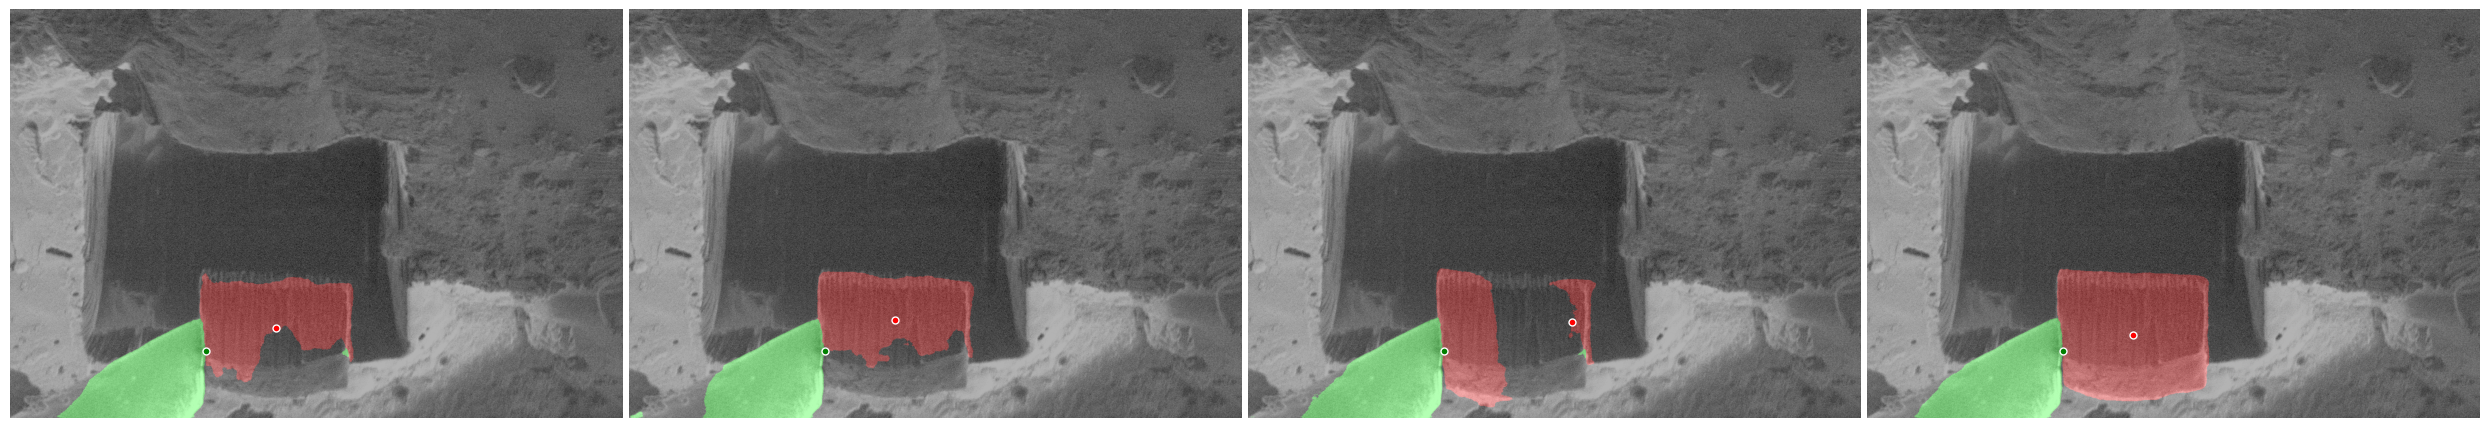

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-31-48PM.tif
Error: 'ImageDescription'


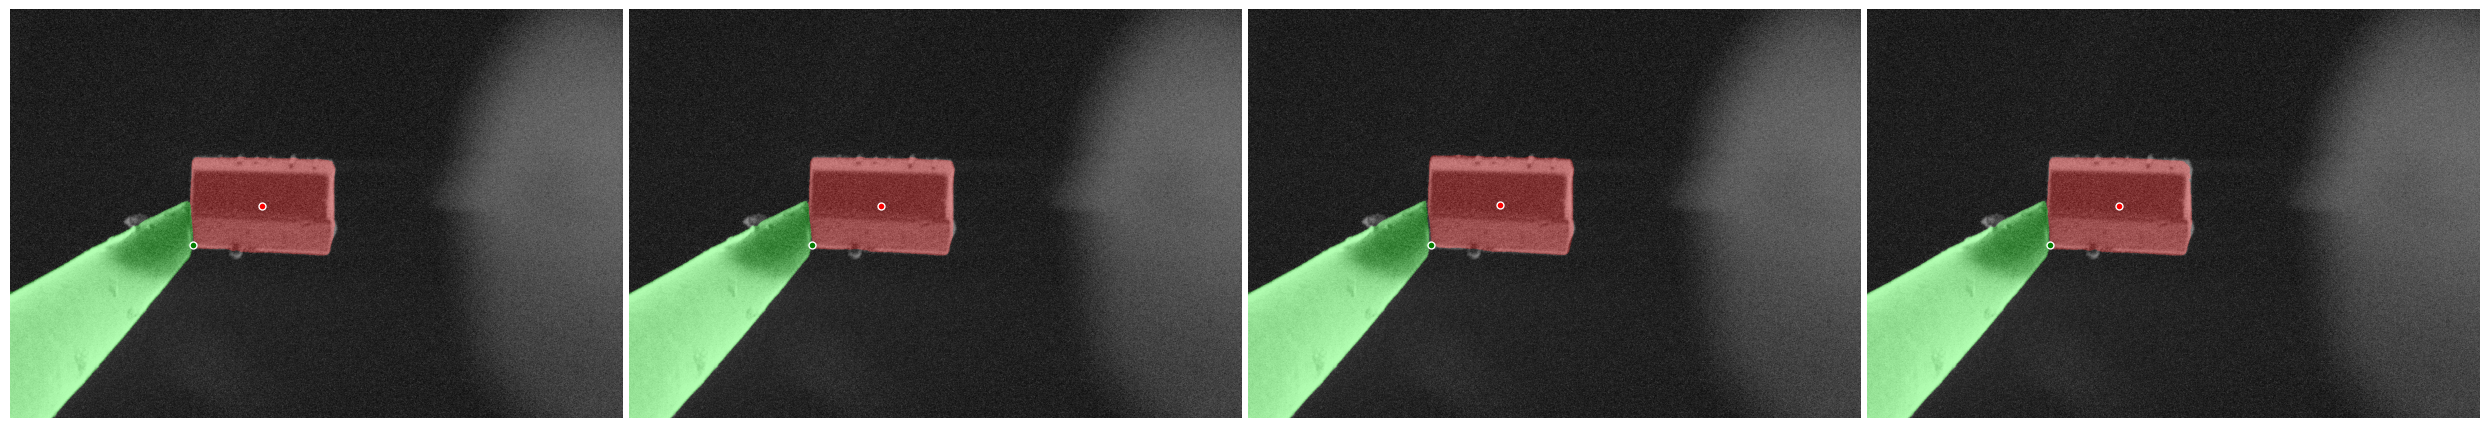

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-43-51PM.tif
Error: 'ImageDescription'


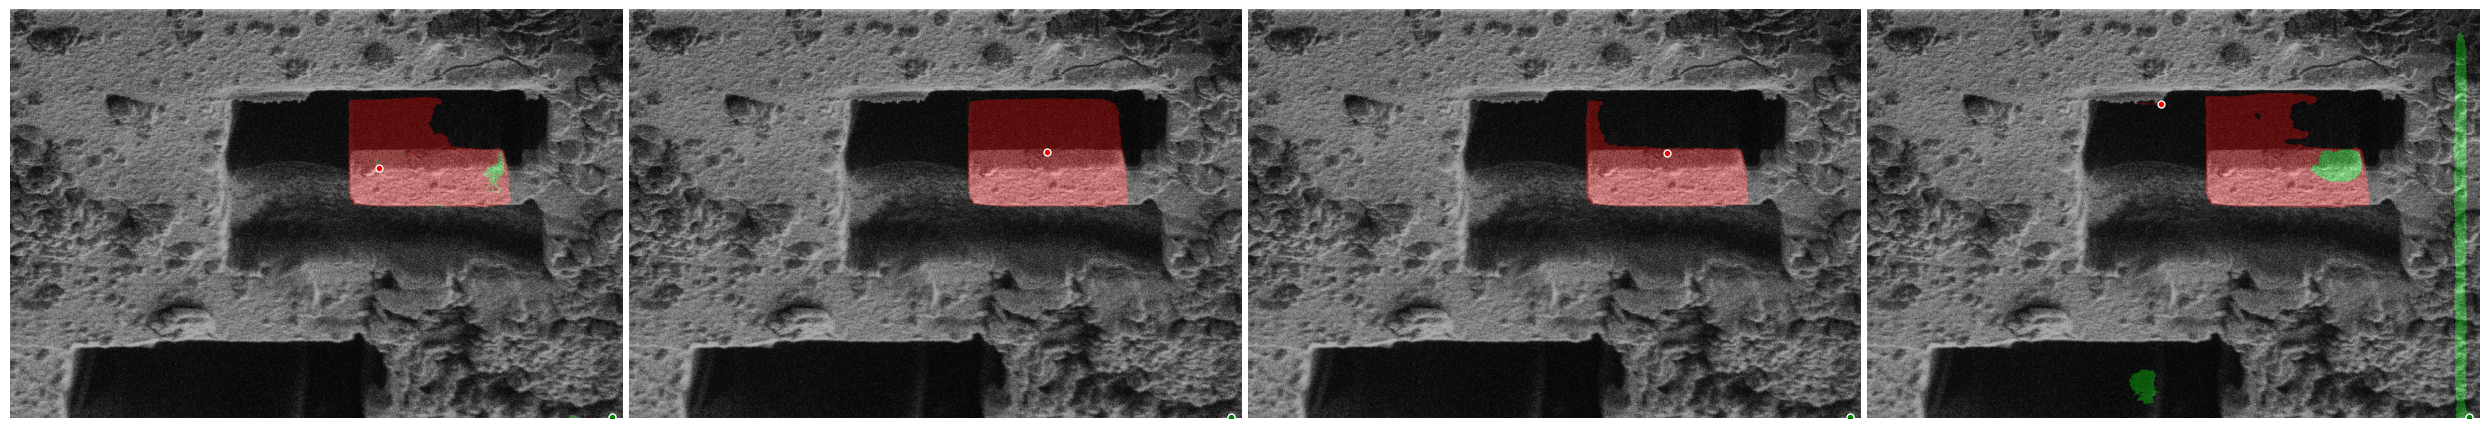

/home/patrick/github/data/liftout/active-learning/train/yeast/images/2023-04-30-05-36-04PM.tif
Error: 'ImageDescription'


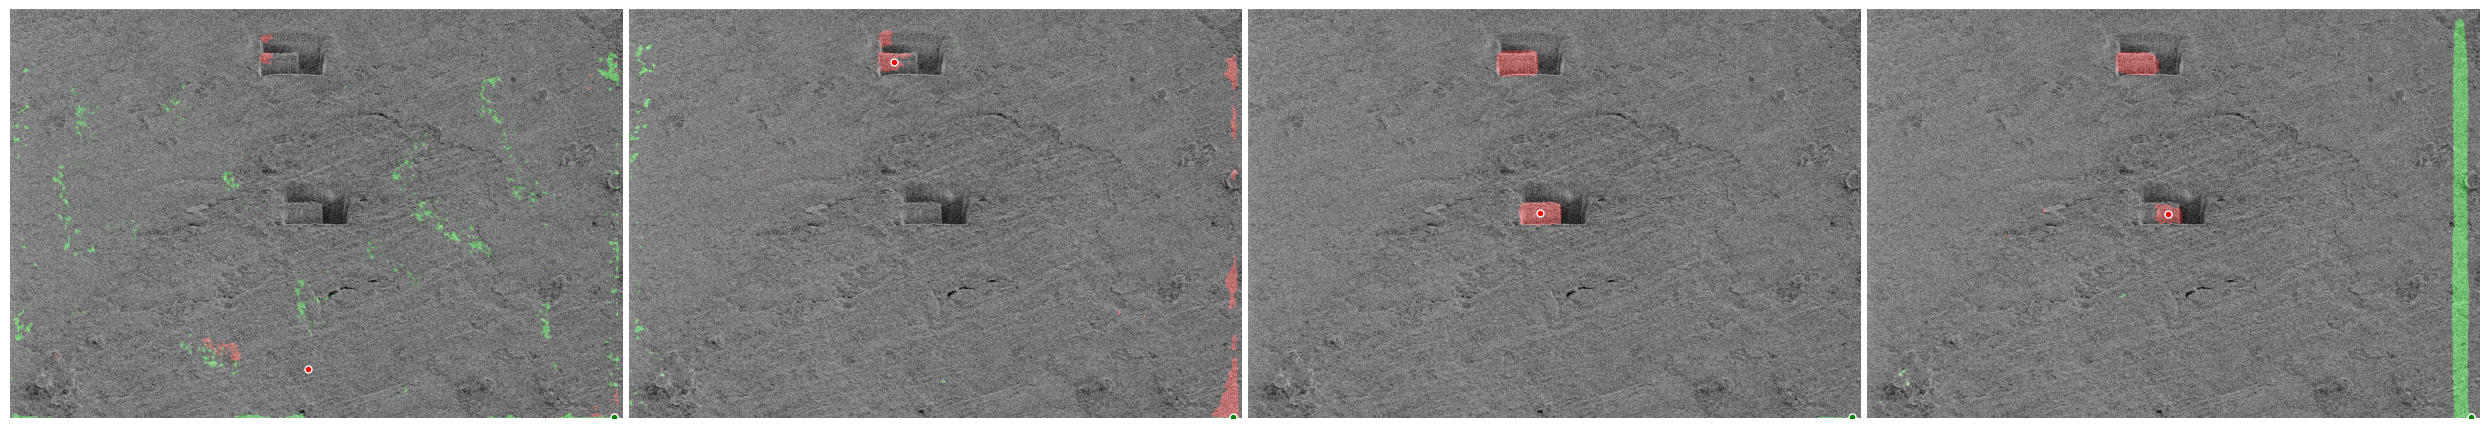

In [4]:
DATA_PATH = "/home/patrick/github/data/liftout/active-learning/train"

SAMPLES = ["dm-embryo", "yeast", "celegans"]

CHECKPOINT_BASE = os.path.join(os.path.dirname(fibsem_model.__file__), "models", "model4.pt")
CHECKPOINT_DM = "/home/patrick/github/fibsem/fibsem/segmentation/models/dm-embryo/30_04_2023_18_42_40_n20_model.pt"
CHECKPOINT_YEAST = "/home/patrick/github/fibsem/fibsem/segmentation/models/yeast/30_04_2023_18_51_45_n20_model.pt"
CHECKPOINT_CE = "/home/patrick/github/fibsem/fibsem/segmentation/models/celegans/30_04_2023_19_01_11_n20_model.pt"


checkpoints = [CHECKPOINT_BASE, CHECKPOINT_DM, CHECKPOINT_YEAST, CHECKPOINT_CE]



for idx, fname in enumerate(filenames):

    
    sample_name = fname.split("_")[0]
    basename = os.path.basename(fname.split("_")[1]).split(".")[0]
    fname = os.path.join(DATA_PATH, sample_name, "images", f"{basename}.tif")
    print(fname)

    image = FibsemImage.load(fname)

    # run detection

    # detect features
    features = [detection.NeedleTip(), detection.LamellaCentre(), 
                # detection.LamellaLeftEdge(), detection.LamellaRightEdge(), 
    ]
    pixelsize = image.metadata.pixel_size.x if image.metadata is not None else 25e-9


    dets = []
    for checkpoint in checkpoints:
        model = load_model(checkpoint=checkpoint, encoder="resnet34")
        det = detection.detect_features(
            deepcopy(image.data), model, features=features, pixelsize=pixelsize
        )

        dets.append(det)

    fig, ax = plt.subplots(1, len(dets), figsize=(25, 7))

    # plt.suptitle(f"{sample_name}:{os.path.basename(fname)}")       

    names = ["Baseline", "Finetuned: Dm-Embryo", "Finetuned: Yeast", "Finetuned: Celegans"]
    for i, det in enumerate(dets):
        ax[i].imshow(det.image, cmap="gray")
        ax[i].imshow(det.rgb, alpha=0.3)
        # ax[i].set_title(names[i])
        
        for f in det.features:
            ax[i].plot(f.px.x, f.px.y, 
                    "o",  color=f.color, 
                    markersize=5, markeredgecolor="w", 
                    label=f.name)
        # ax[i].legend(loc="best")
        ax[i].axis("off")

    plt.tight_layout()
    # reduce spacing
    plt.subplots_adjust(hspace=0.01, wspace=0.01)
    
    # save
    OUTPUT_PATH = os.path.join(DATA_PATH, "evaluation", "selected", "final")
    os.makedirs(OUTPUT_PATH, exist_ok=True)
    basename = os.path.basename(fname).split('.')[0]
    plt.savefig(os.path.join(OUTPUT_PATH, f"{sample_name}_{basename}.png"), dpi=300)

    plt.show()

/home/patrick/github/data/liftout/active-learning/train/celegans/images/2023-04-30-06-07-43PM.tif
/home/patrick/github/data/liftout/active-learning/train/celegans/images/2023-04-30-06-07-52PM.tif
/home/patrick/github/data/liftout/active-learning/train/celegans/images/2023-04-30-06-09-25PM.tif
/home/patrick/github/data/liftout/active-learning/train/celegans/images/2023-04-30-06-09-53PM.tif
/home/patrick/github/data/liftout/active-learning/train/celegans/images/2023-04-30-06-12-19PM.tif
/home/patrick/github/data/liftout/active-learning/train/celegans/images/2023-04-30-06-14-39PM.tif
/home/patrick/github/data/liftout/active-learning/train/celegans/images/2023-04-30-06-18-44PM.tif
/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-31-48PM.tif
Error: 'ImageDescription'
/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt resnet18
/home/patrick/github/fibsem/fibsem/segment

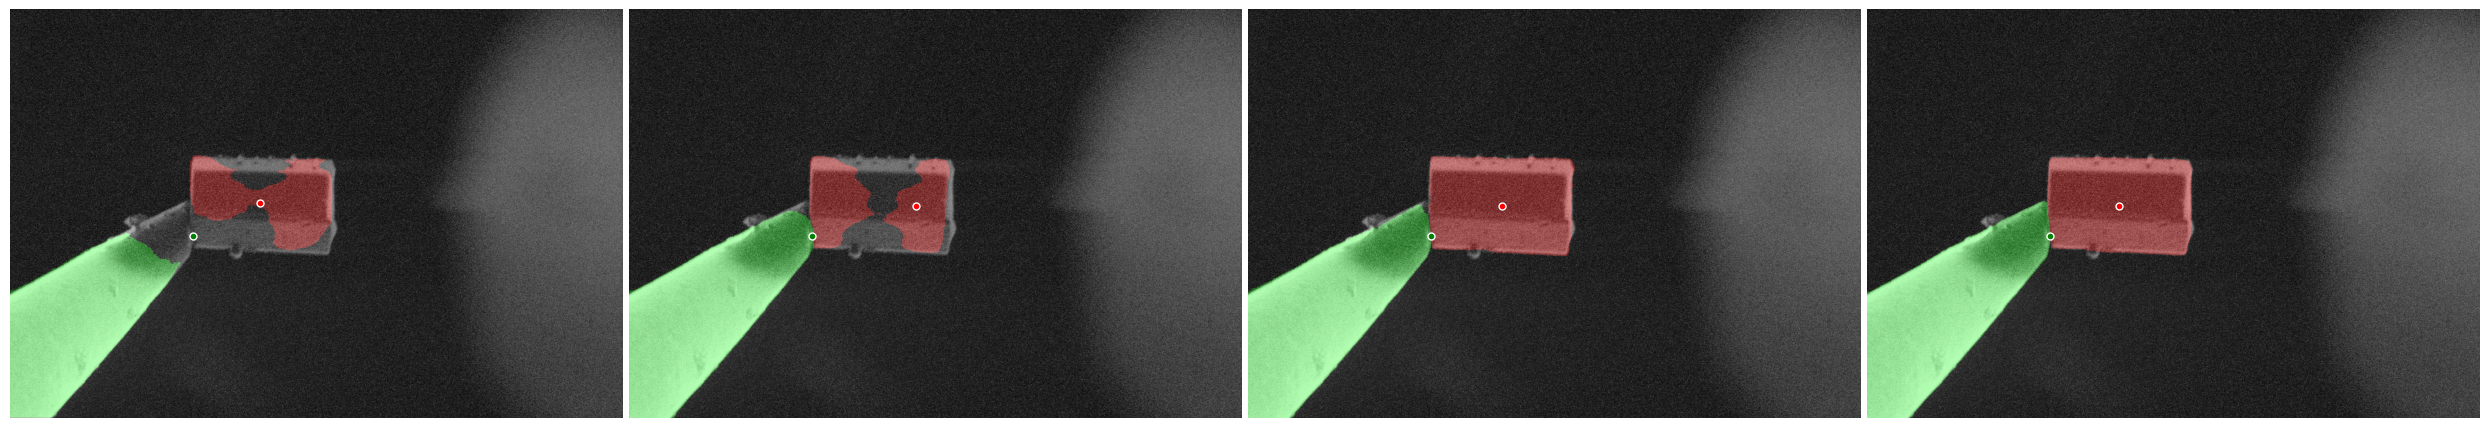

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-35-13PM.tif
Error: 'ImageDescription'
/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model3.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model4.pt resnet34


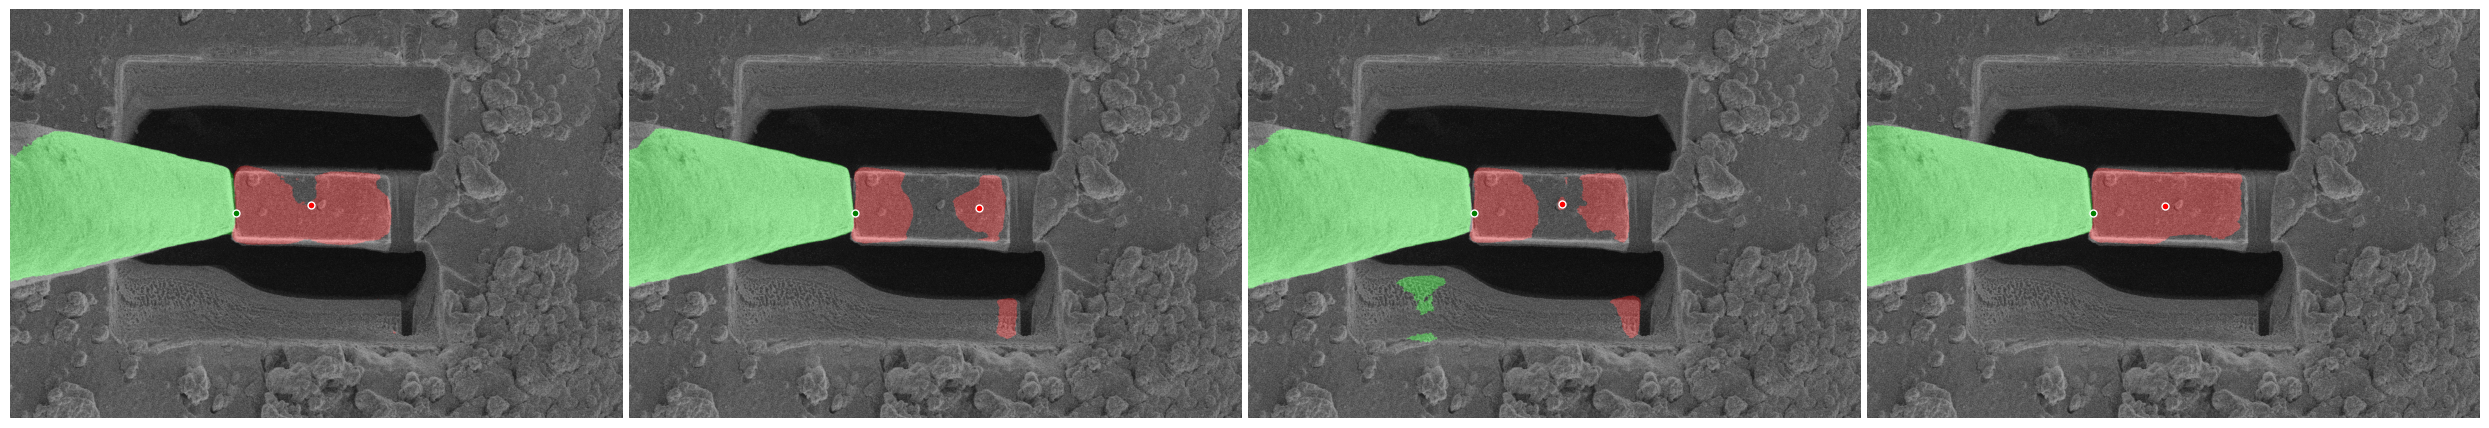

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-38-12PM.tif
Error: 'ImageDescription'
/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model3.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model4.pt resnet34


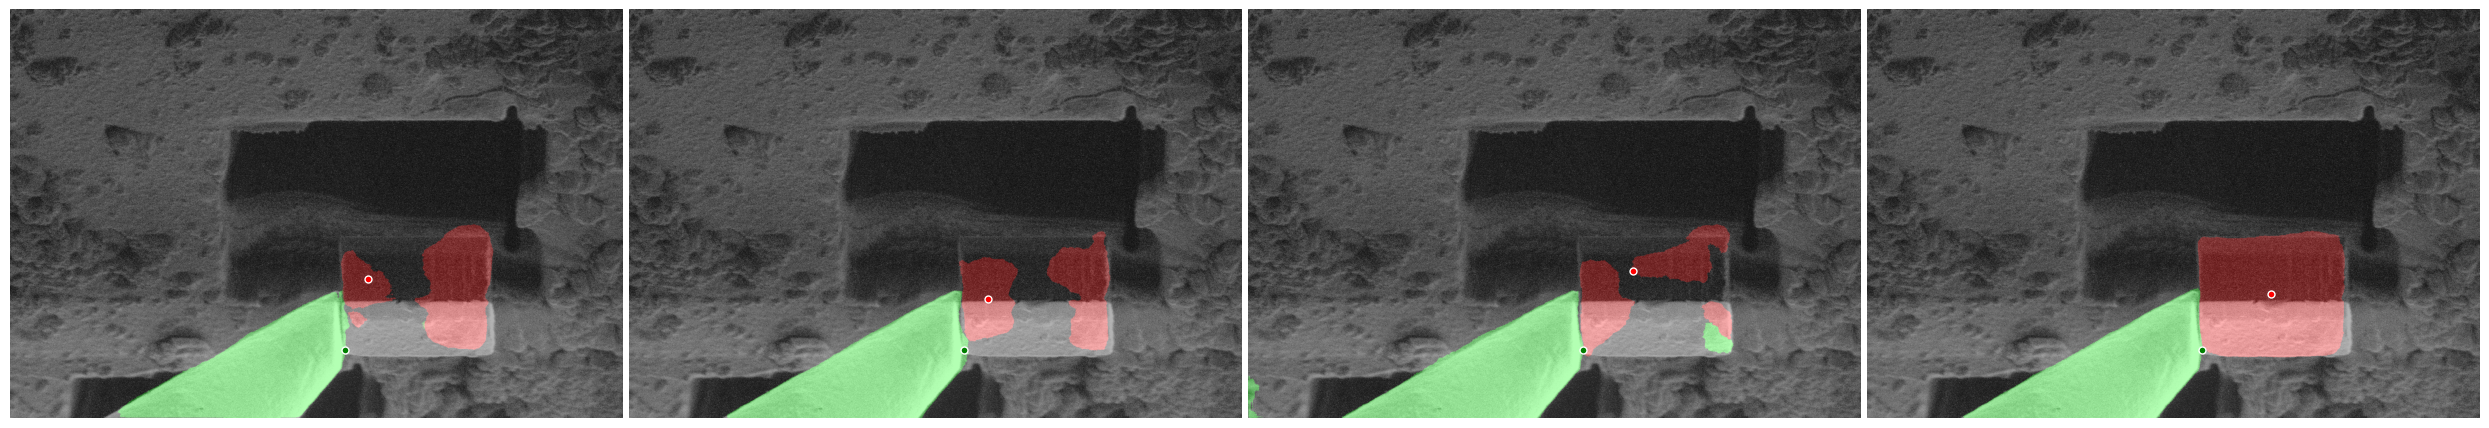

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-40-41PM.tif
Error: 'ImageDescription'
/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model3.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model4.pt resnet34


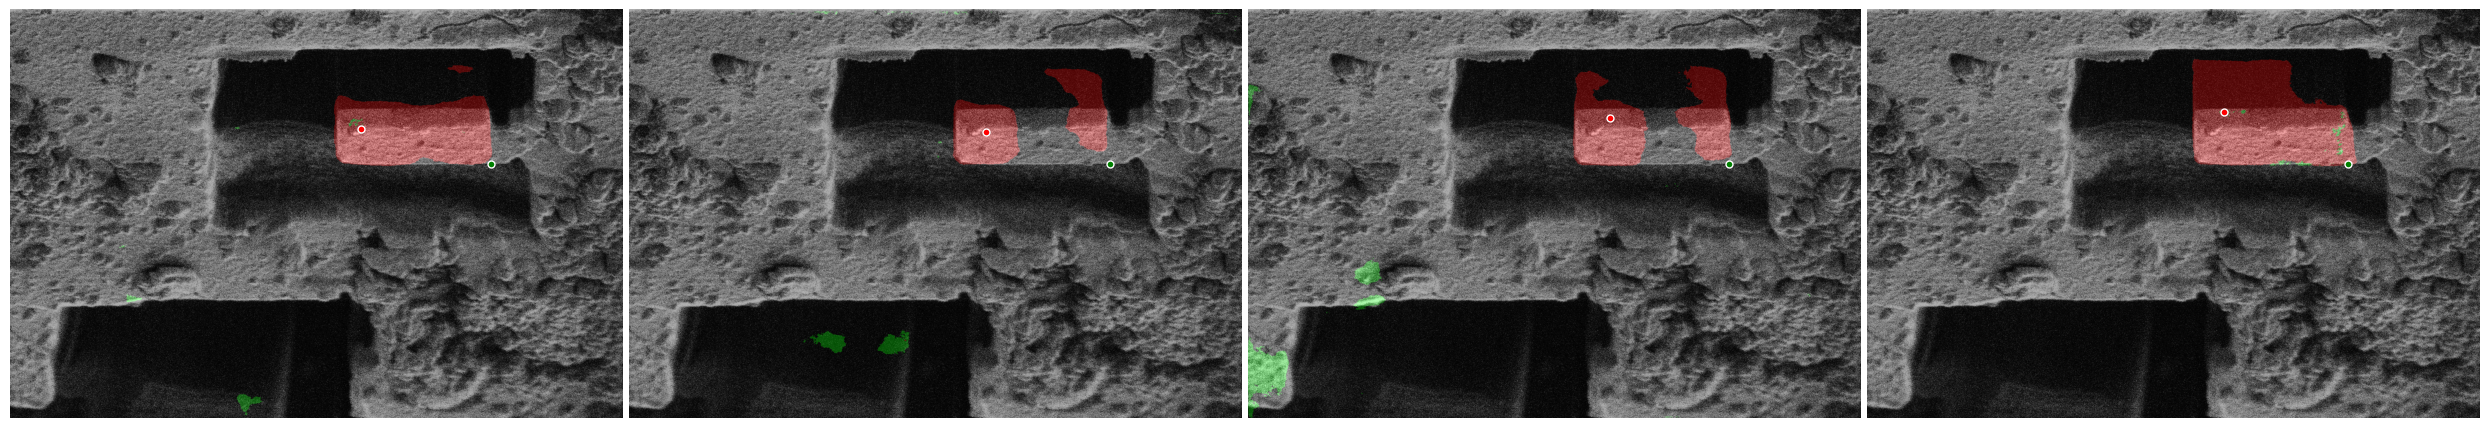

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-41-05PM.tif
Error: 'ImageDescription'
/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model3.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model4.pt resnet34


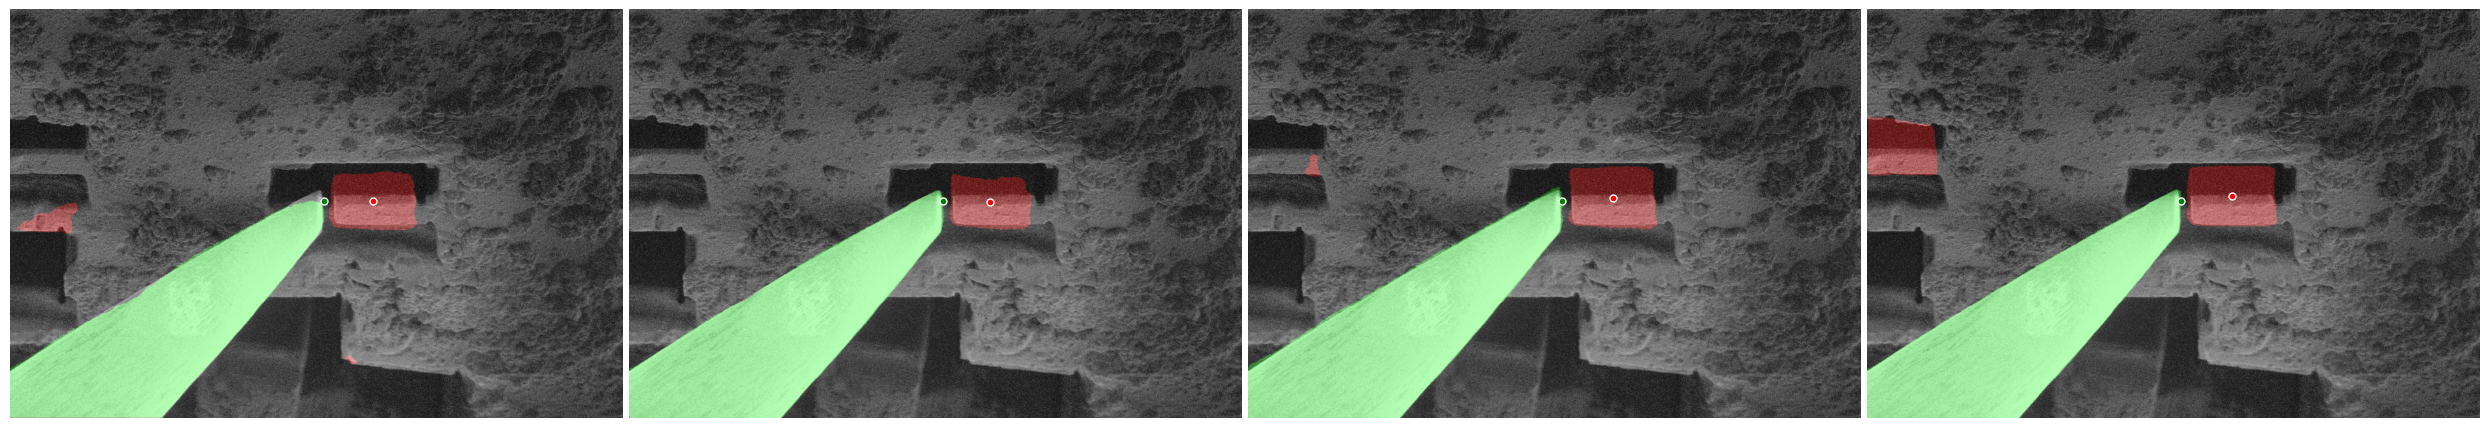

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-43-12PM.tif
Error: 'ImageDescription'
/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model3.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model4.pt resnet34


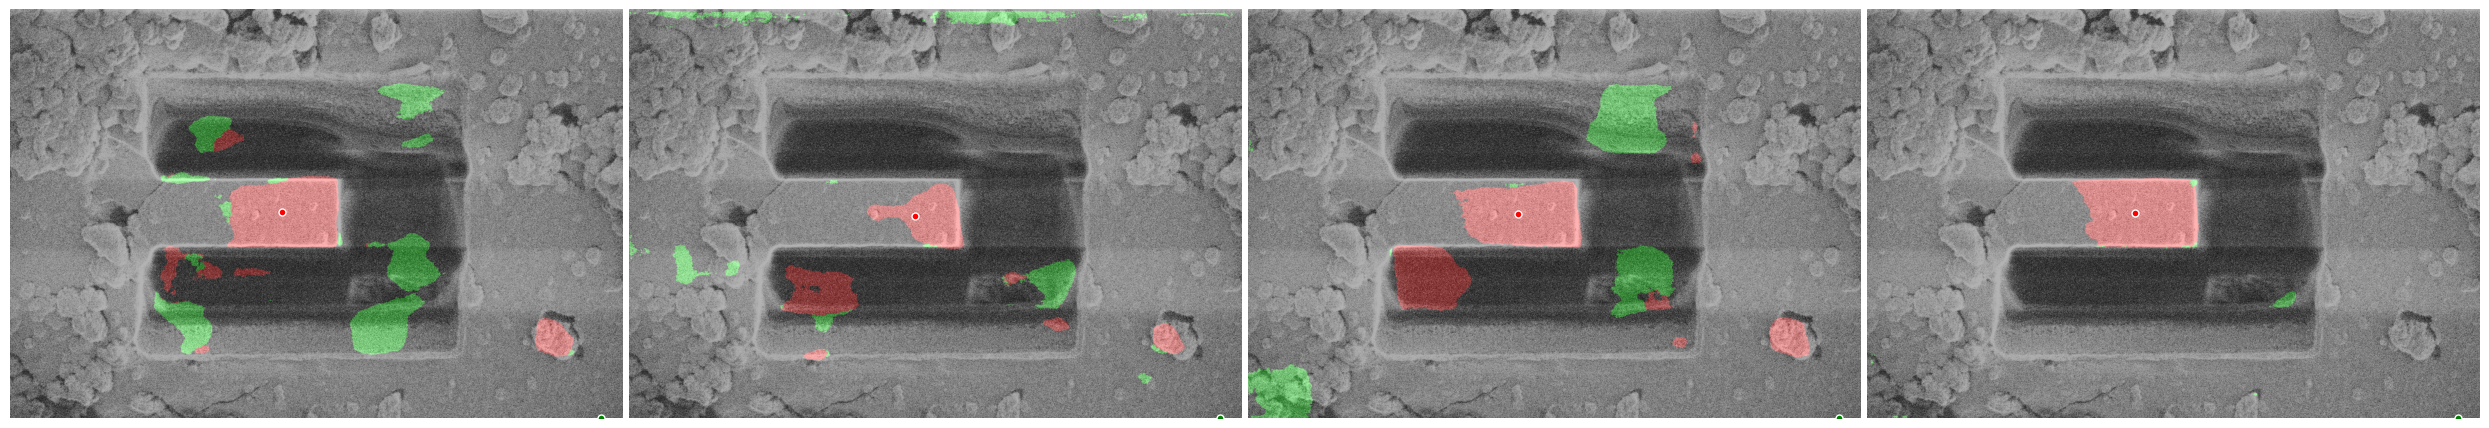

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-43-51PM.tif
Error: 'ImageDescription'
/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model3.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model4.pt resnet34


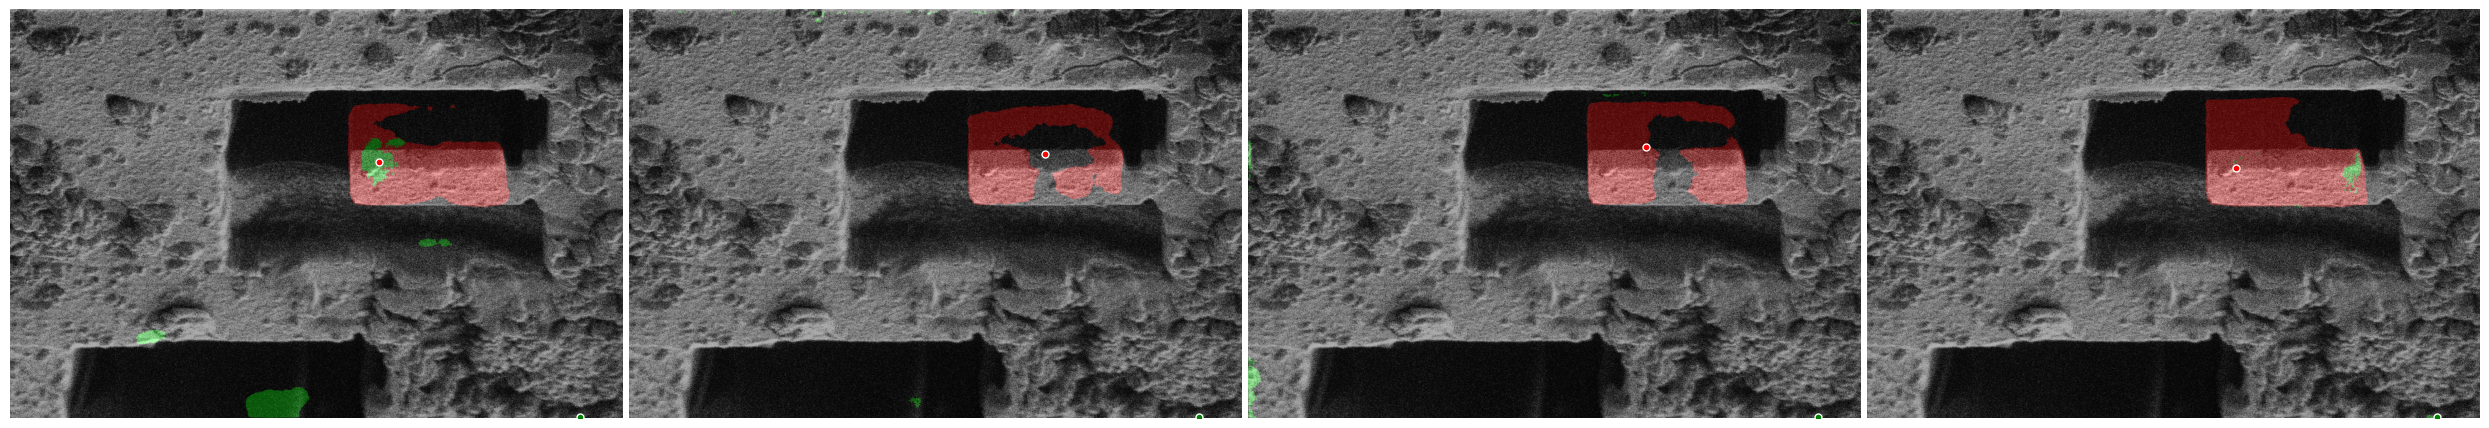

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-46-46PM.tif
Error: 'ImageDescription'
/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model3.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model4.pt resnet34


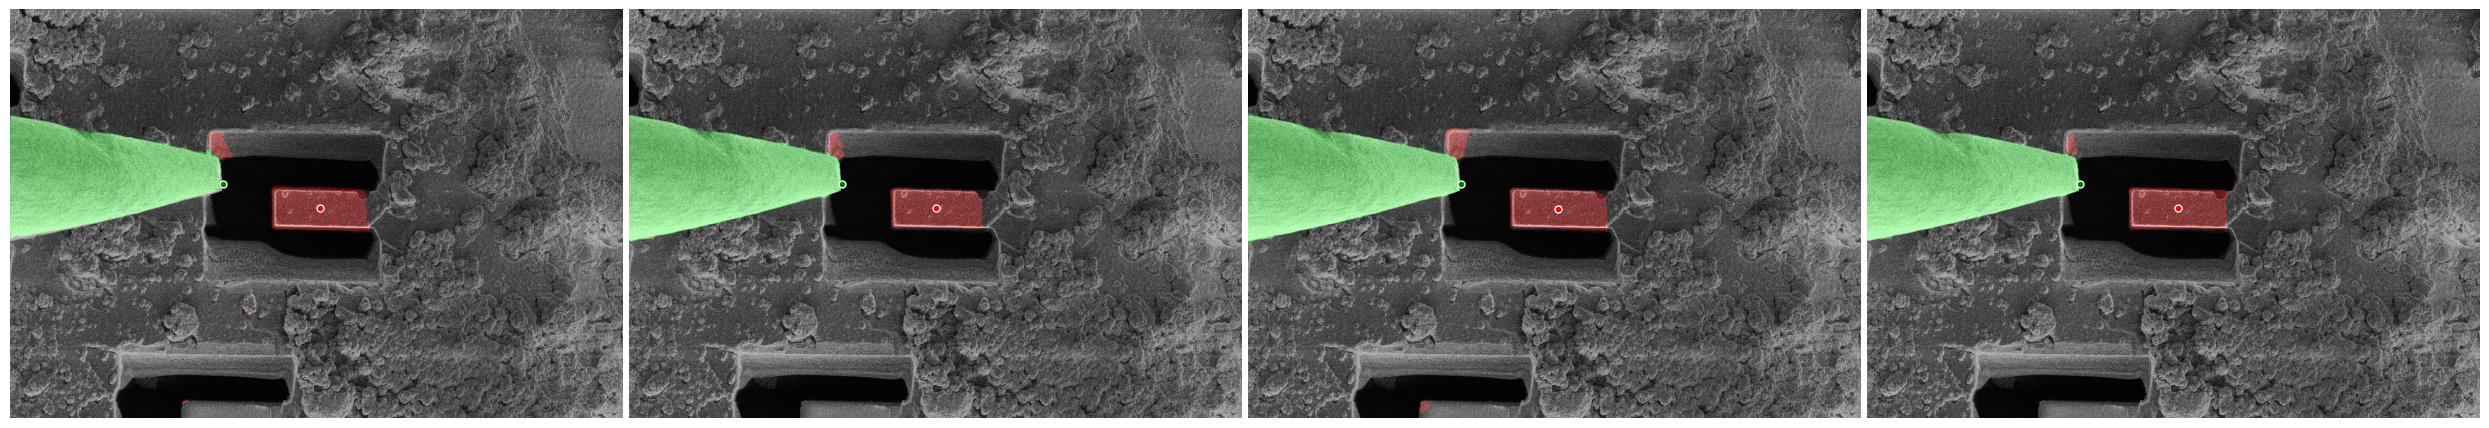

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-53-18PM.tif
Error: 'ImageDescription'
/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model3.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model4.pt resnet34


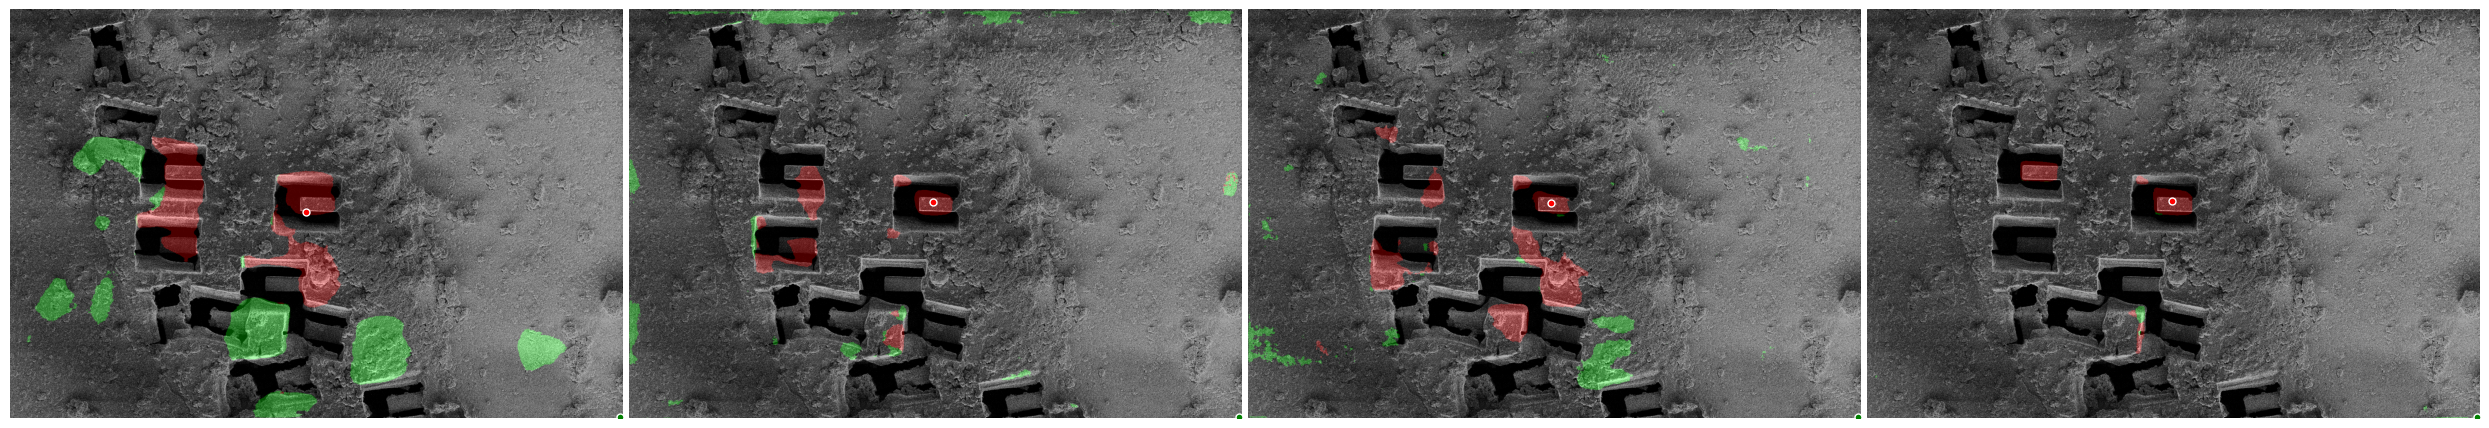

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-53-22PM.tif
Error: 'ImageDescription'
/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model3.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model4.pt resnet34


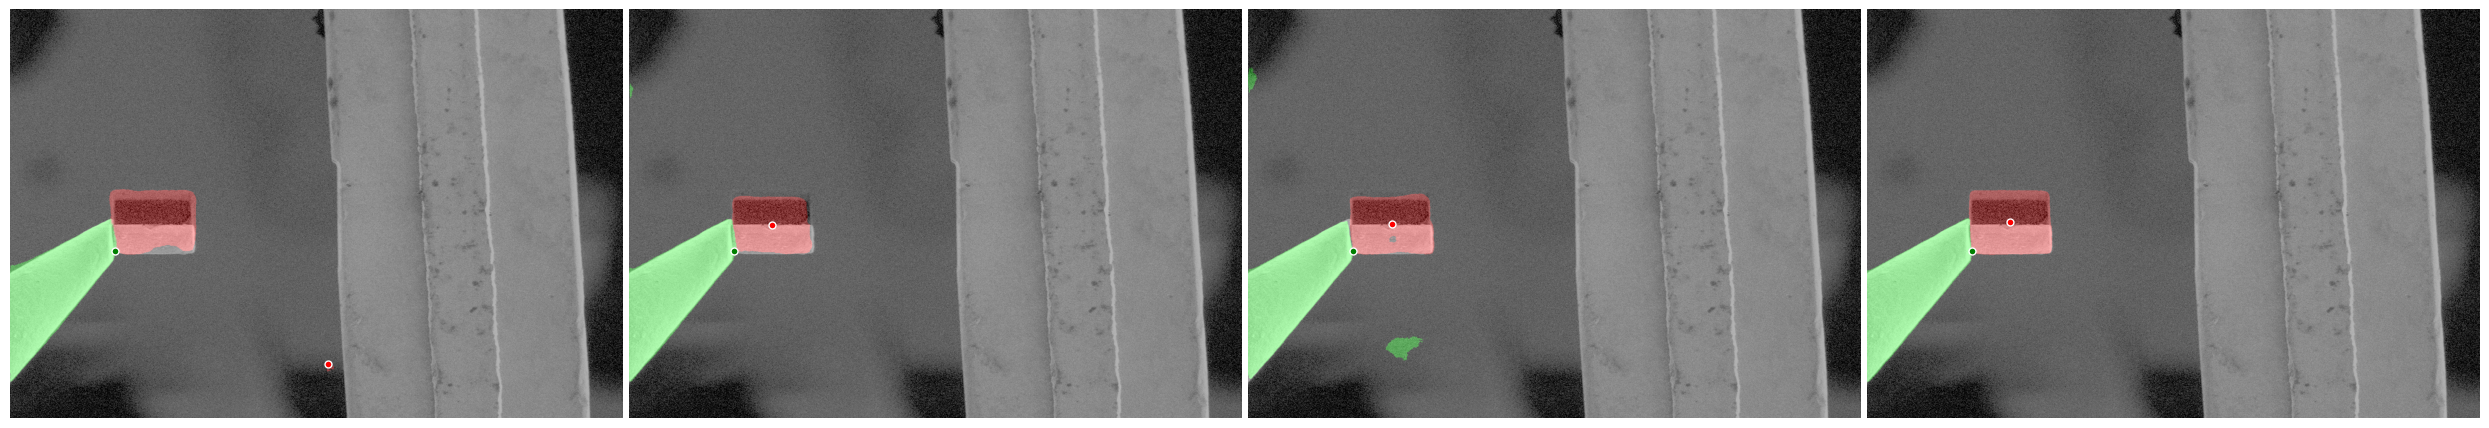

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-57-26PM.tif
Error: 'ImageDescription'
/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model3.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model4.pt resnet34


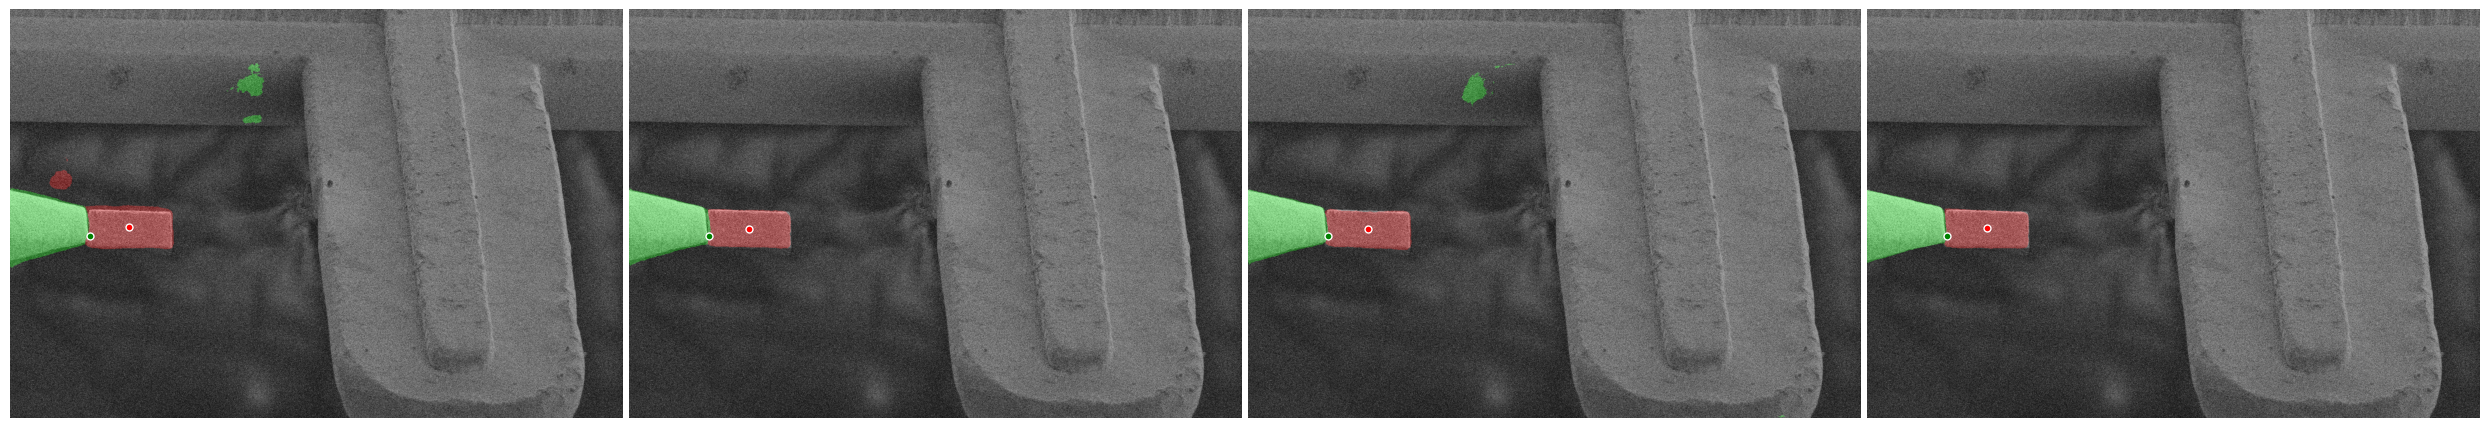

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-58-24PM.tif
Error: 'ImageDescription'
/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model3.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model4.pt resnet34


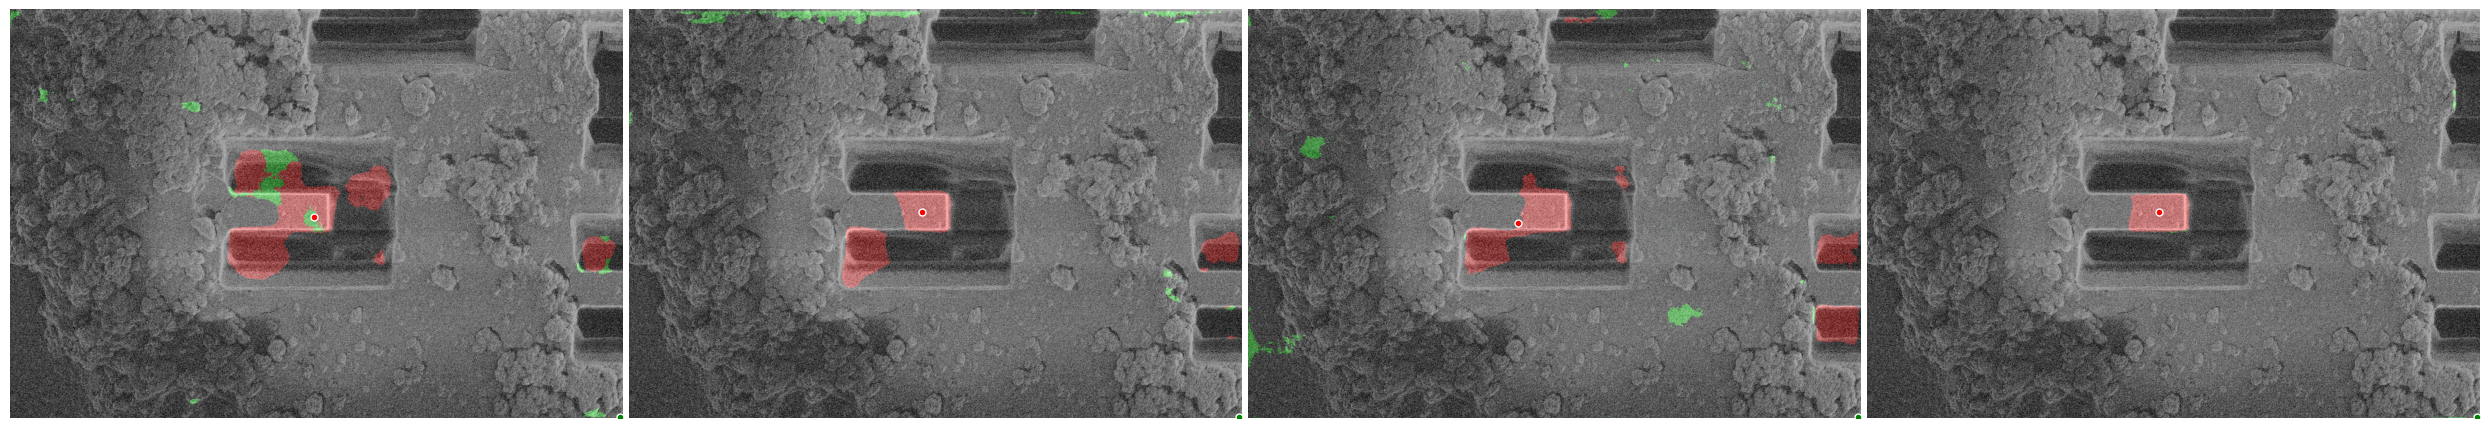

/home/patrick/github/data/liftout/active-learning/train/dm-embryo/images/2023-04-30-04-59-47PM.tif
Error: 'ImageDescription'
/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model3.pt resnet18
/home/patrick/github/fibsem/fibsem/segmentation/models/model4.pt resnet34


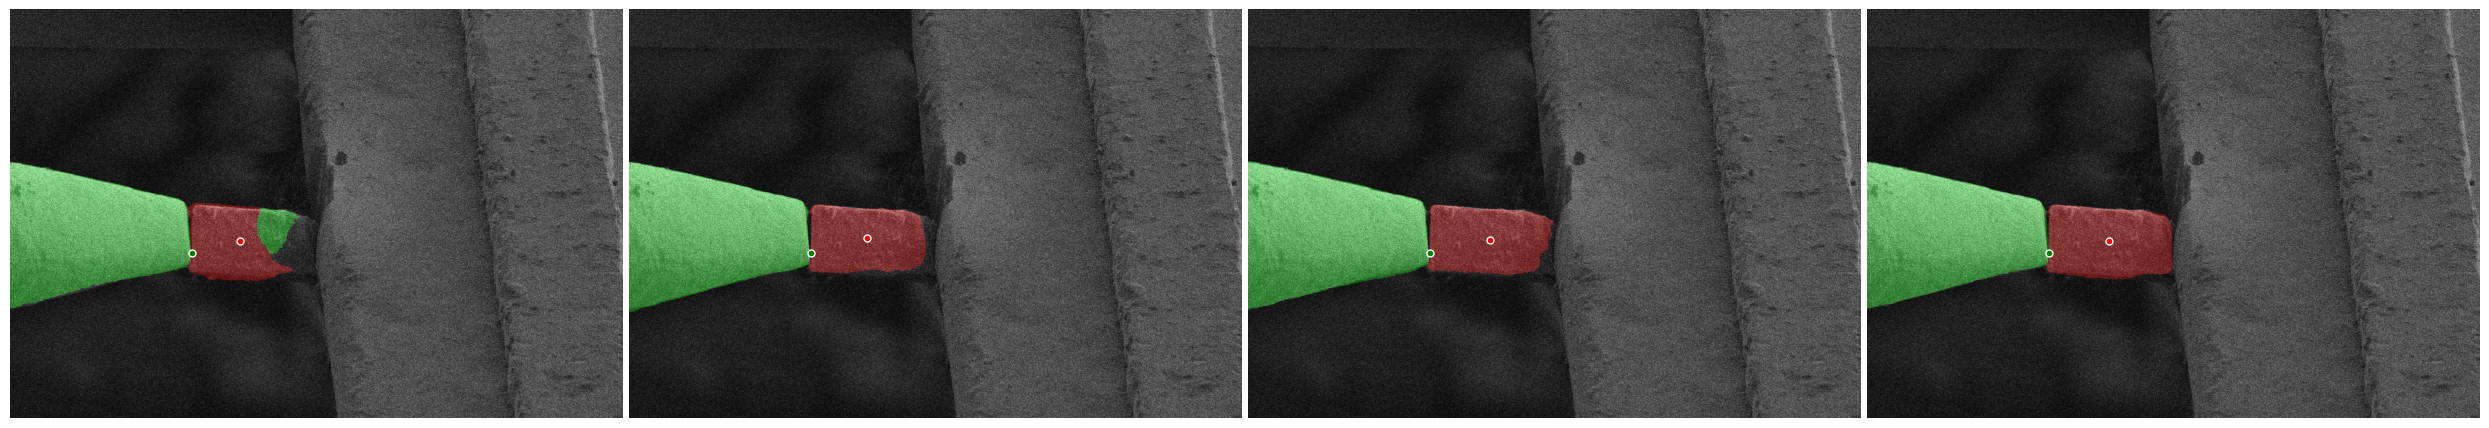

/home/patrick/github/data/liftout/active-learning/train/yeast/images/2023-04-30-05-05-49PM.tif
/home/patrick/github/data/liftout/active-learning/train/yeast/images/2023-04-30-05-07-53PM.tif
/home/patrick/github/data/liftout/active-learning/train/yeast/images/2023-04-30-05-11-45PM.tif
/home/patrick/github/data/liftout/active-learning/train/yeast/images/2023-04-30-05-12-30PM.tif
/home/patrick/github/data/liftout/active-learning/train/yeast/images/2023-04-30-05-12-57PM.tif
/home/patrick/github/data/liftout/active-learning/train/yeast/images/2023-04-30-05-13-46PM.tif
/home/patrick/github/data/liftout/active-learning/train/yeast/images/2023-04-30-05-16-59PM.tif
/home/patrick/github/data/liftout/active-learning/train/yeast/images/2023-04-30-05-21-04PM.tif
/home/patrick/github/data/liftout/active-learning/train/yeast/images/2023-04-30-05-22-54PM.tif
/home/patrick/github/data/liftout/active-learning/train/yeast/images/2023-04-30-05-23-30PM.tif
/home/patrick/github/data/liftout/active-learning/

In [4]:
DATA_PATH = "/home/patrick/github/data/liftout/active-learning/train"

SAMPLES = ["dm-embryo", "yeast", "celegans"]


CHECKPOINT_ONE = "/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt"
CHECKPOINT_TWO = "/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt"
CHECKPOINT_THREE = "/home/patrick/github/fibsem/fibsem/segmentation/models/model3.pt"
CHECKPOINT_FINAL = os.path.join(os.path.dirname(fibsem_model.__file__), "models", "model4.pt")



checkpoints = [CHECKPOINT_ONE, CHECKPOINT_TWO, CHECKPOINT_THREE, CHECKPOINT_FINAL]



for idx, fname in enumerate(filenames):

    
    sample_name = fname.split("_")[0]
    basename = os.path.basename(fname.split("_")[1]).split(".")[0]
    fname = os.path.join(DATA_PATH, sample_name, "images", f"{basename}.tif")
    print(fname)

    if sample_name != "dm-embryo":
        continue

    image = FibsemImage.load(fname)

    # run detection

    # detect features
    features = [detection.NeedleTip(), detection.LamellaCentre(), 
                # detection.LamellaLeftEdge(), detection.LamellaRightEdge(), 
    ]
    pixelsize = image.metadata.pixel_size.x if image.metadata is not None else 25e-9


    dets = []
    encoders = ["resnet18", "resnet18", "resnet18", "resnet34"]
    for checkpoint, encoder in zip(checkpoints, encoders):
        print(checkpoint, encoder)
        model = load_model(checkpoint=checkpoint, encoder=encoder)
        det = detection.detect_features(
            deepcopy(image.data), model, features=features, pixelsize=pixelsize
        )

        dets.append(det)

    fig, ax = plt.subplots(1, len(dets), figsize=(25, 7))      

    names = ["Iteration 01", "Iteration 02", "Iteration 03", "Final Baseline Model"]
    for i, det in enumerate(dets):
        ax[i].imshow(det.image, cmap="gray")
        ax[i].imshow(det.rgb, alpha=0.3)
        # ax[i].set_title(names[i])
        
        for f in det.features:
            ax[i].plot(f.px.x, f.px.y, 
                    "o",  color=f.color, 
                    markersize=5, markeredgecolor="w", 
                    label=f.name)
        # ax[i].legend(loc="best")
        ax[i].axis("off")

    plt.tight_layout()
    # reduce spacing
    plt.subplots_adjust(hspace=0.01, wspace=0.01)
    
    # save
    OUTPUT_PATH = os.path.join(DATA_PATH, "evaluation", "selected", "development", "final")
    os.makedirs(OUTPUT_PATH, exist_ok=True)
    basename = os.path.basename(fname).split('.')[0]
    plt.savefig(os.path.join(OUTPUT_PATH, f"{sample_name}_{basename}.png"), dpi=300)

    plt.show()

In [11]:
TRAIN_PATH = "/home/patrick/github/data/liftout/training/train/images"


import glob

filenames = glob.glob(os.path.join(TRAIN_PATH, "*.tif"))

print(len(filenames))

# count how many filenames start with 0, a, b, c , d
counts = [0, 0, 0, 0]
for fname in filenames:

    basename = os.path.basename(fname).split(".")[0]
    if basename.startswith("0"):
        counts[0] += 1
    elif basename.startswith("a"):
        counts[1] += 1
    elif basename.startswith("b") or basename.startswith("c"):
        counts[2] += 1
    elif basename.startswith("d"):
        counts[3] += 1


print(counts)

import plotly.express as px

names = ["Iteration 01", "Iteration 02", "Iteration 03", "Iteration 04"]

fig = px.bar(x=names, y=counts, color=names)

# set legend name as Dataset
fig.update_layout(legend_title_text='Dataset')

# set y axis title as Number of Images
fig.update_yaxes(title_text='Number of Images')
fig.update_xaxes(title_text='Dataset Iteration')

fig.show()


423
[193, 57, 70, 103]


In [52]:
LABEL_PATH = "/home/patrick/github/data/liftout/training/train/labels"

filenames = glob.glob(os.path.join(LABEL_PATH, "*.tif"))

dlist = []
# count the average number of pixels per class (0, 1, 2) per image
counts = {0: [[], [], [], []], 1: [[], [], [], []], 2: [[], [], [], []]}
for fname in filenames:
    print(fname)
    label = FibsemImage.load(fname)

    data = {"0": [], "1": [], "2": []}


    # what does filename start with?
    basename = os.path.basename(fname).split(".")[0]
    if basename.startswith("0"):
        idx = 0
    elif basename.startswith("a"):
        idx = 1
    elif basename.startswith("b") or basename.startswith("c"):
        idx = 2
    elif basename.startswith("d"):
        idx = 3

    data["dataset"] = idx

    # count the number of pixels per class
    for i in range(3):
        data[str(i)] = np.sum(label.data == i)
        # counts[i][idx].append(data[str(i)])

    dlist.append(deepcopy(data))

    

/home/patrick/github/data/liftout/training/train/labels/a00020.tif
Error: 'ImageDescription'
/home/patrick/github/data/liftout/training/train/labels/00203.tif
Error: 'ImageDescription'
/home/patrick/github/data/liftout/training/train/labels/00132.tif
Error: 'ImageDescription'
/home/patrick/github/data/liftout/training/train/labels/00133.tif
Error: 'ImageDescription'
/home/patrick/github/data/liftout/training/train/labels/d00018.tif
Error: 'ImageDescription'
/home/patrick/github/data/liftout/training/train/labels/d00098.tif
Error: 'ImageDescription'
/home/patrick/github/data/liftout/training/train/labels/00120.tif
Error: 'ImageDescription'
/home/patrick/github/data/liftout/training/train/labels/d00066.tif
Error: 'ImageDescription'
/home/patrick/github/data/liftout/training/train/labels/c00021.tif
Error: 'ImageDescription'
/home/patrick/github/data/liftout/training/train/labels/00049.tif
Error: 'ImageDescription'
/home/patrick/github/data/liftout/training/train/labels/00202.tif
Error: 'I

In [63]:
import pandas as pd

df = pd.DataFrame(dlist)

# group by dataset, then take the mean
df = df.groupby("dataset").mean()
df = df.reset_index()

# rename columns, 0=background, 1=lamella, 2=needle
df = df.rename(columns={"0": "background", "1": "lamella", "2": "needle"})
display(df)



# plot as stacked barchart in plotly express

import plotly.express as px

names = ["Iteration 01", "Iteration 02", "Iteration 03", "Iteration 04"]

fig = px.bar(df, x=names, y=["lamella", "needle"], barmode="stack", color_discrete_sequence=["green", "red"])

# set legend name as Dataset
fig.update_layout(legend_title_text='Dataset')

# set y axis title as Number of Images
fig.update_yaxes(title_text='Number of Pixels')

fig.update_xaxes(title_text='Dataset Iteration')

fig.show()


dataset    background       lamella         needle
0        0  1.468443e+06  37822.704663   66598.238342
1        1  1.454388e+06  17806.877193  100669.070175
2        2  1.405509e+06  27635.685714  139719.771429
3        3  1.418305e+06  50922.038835  103637.300971

{0: array([1468443.05699482,   37822.70466321,   66598.23834197]),
 1: array([1454388.05263158,   17806.87719298,  100669.07017544]),
 2: array([1405508.54285714,   27635.68571429,  139719.77142857]),
 3: array([1418304.66019417,   50922.03883495,  103637.30097087])}
